### Life Cycel of Machine Learning Project

- understanding the Problem Statement
- Data Collection 
- Data Check to perform
- Exploratory data analysis
- data pre-processing
- Model Traning
- choose best model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### importing the csv Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


### Data Checks to Perform
- check missing value
- check Duplicates
- check data type
- check the number of unique value of each column
- check statistics data set
- check various categories present in the different categorical column

In [4]:
#Chceck Missing Value
df.isna().sum()

Unnamed: 0                     0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is No Missing Value is Present in the dataset.

In [5]:
# Check Duplicate Value
df.duplicated().sum()

0

### There is No Duplicate Values Present in the Dataset

But if there is Any duplicate value are present in the dataset
there you just remove that value. For That you should be the use
__drop_duplicates()__

In [6]:
# Check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race_ethnicity               1000 non-null   object
 3   parental_level_of_education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test_preparation_course      1000 non-null   object
 6   math_score                   1000 non-null   int64 
 7   reading_score                1000 non-null   int64 
 8   writing_score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
# Checking the number of unique values of each column
df.nunique()

Unnamed: 0                     1000
gender                            2
race_ethnicity                    5
parental_level_of_education       6
lunch                             2
test_preparation_course           2
math_score                       81
reading_score                    72
writing_score                    77
dtype: int64

In [8]:
#check statistic of data set
df.describe()

,Unnamed: 0,math_score,reading_score,writing_score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,0.000000,0.00000,17.000000,10.000000
25%,249.750000,57.00000,59.000000,57.750000
50%,499.500000,66.00000,70.000000,69.000000
75%,749.250000,77.00000,79.000000,79.000000
max,999.000000,100.00000,100.000000,100.000000


In [9]:
from scipy.stats import shapiro
_,p_value = shapiro(df['math_score'])

if p_value> 0.05:
    print("Data is Normally Distributed")
    
else:
    print("Data Not Normally Distributed")

Data Not Normally Distributed


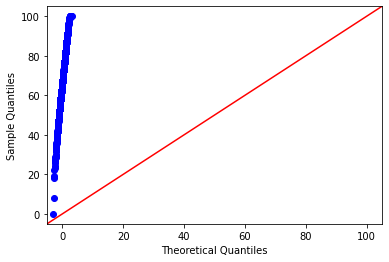

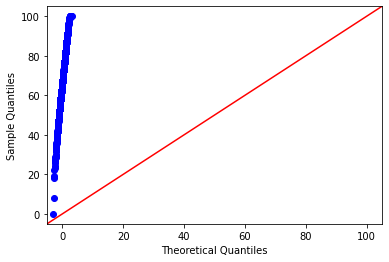

In [10]:
from statsmodels.api import qqplot
qqplot(df['math_score'],line='45')

<AxesSubplot:xlabel='math_score', ylabel='Count'>

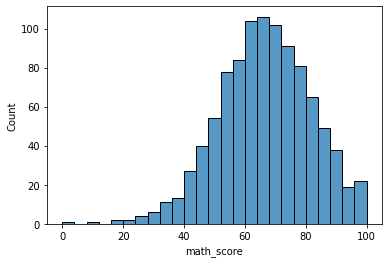

In [11]:
sns.histplot(df['math_score'])

In [12]:
from scipy.stats import skew
skew(df['math_score'])

-0.278516571914075

## What that Skew Value Show us?
if the skewness is close to zero, the data is approximately normally distributed. if the skewness is postive, the data is right- skewed and if it is negative the data is left skewed

## There are several ways to tranform skewd data into a noraml distribution 

- Logarithmic Transfromation
- Square root Transfromation
- Box-Cox Transformation

### Log Normal Transformation


In [13]:


data_log = np.log(df['math_score'])
data_log

0      4.276666
1      4.234107
2      4.499810
3      3.850148
4      4.330733
         ...   
995    4.477337
996    4.127134
997    4.077537
998    4.219508
999    4.343805
Name: math_score, Length: 1000, dtype: float64

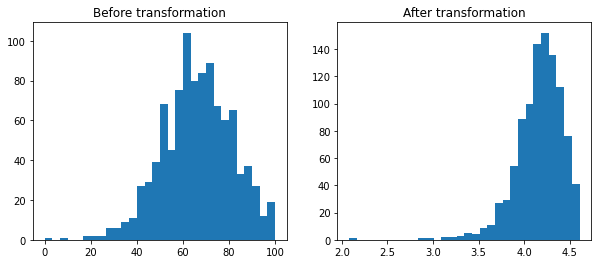

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].hist(df['math_score'], bins=30)
axs[0].set_title("Before transformation")
axs[1].hist(data_log[np.isfinite(data_log).values], bins=30)
axs[1].set_title("After transformation")
plt.show()

### square root transfromation

In [15]:
sqrt_transfromation = np.sqrt(df['math_score'])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   3.,   4.,   8.,   8.,  23.,  26.,  42.,  85.,
         88., 136., 164., 135.,  98.,  97.,  48.,  31.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <BarContainer object of 30 artists>)

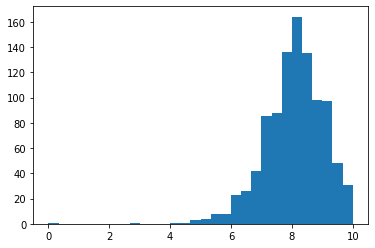

In [16]:
plt.hist(sqrt_transfromation,bins=30)

In [17]:
# define numerical & categorical columns 
numerical_features = [ feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f" we have: {len(numerical_features)}\n nmerical feature:\n {numerical_features} \n")
print(f" we have: {len(categorical_features)}\n nmerical feature:\n {categorical_features}")


 we have: 4
 nmerical feature:
 ['Unnamed: 0', 'math_score', 'reading_score', 'writing_score'] 

 we have: 5
 nmerical feature:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total score And Average

In [18]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df["average"] = df['total_score']/3
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

In [20]:
print(f'Number of studen with full marks in Math {math_full}')
print(f'Number of studen with full marks in writing {writing_full}')
print(f'Number of studen with full marks in reading {reading_full}')


Number of studen with full marks in Math 7
Number of studen with full marks in writing 14
Number of studen with full marks in reading 17


In [21]:
df[df['writing_score']==100]

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
106,106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
165,165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
403,403,female,group D,high school,standard,completed,88,99,100,287,95.666667
458,458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
566,566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
685,685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667
903,903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667


In [22]:
df[df['total_score']==300]

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
458,458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [23]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()


In [24]:
print(f"Number of student with less than 20 mark in math: {math_less_20}")
print(f"Number of student with less than 20 mark in writing: {writing_less_20}")
print(f"Number of student with less than 20 mark in reading: {reading_less_20}")

Number of student with less than 20 mark in math: 4
Number of student with less than 20 mark in writing: 3
Number of student with less than 20 mark in reading: 1


### Exploring Data (Visualization)


### Histogram & KDE

<AxesSubplot:xlabel='average', ylabel='Count'>

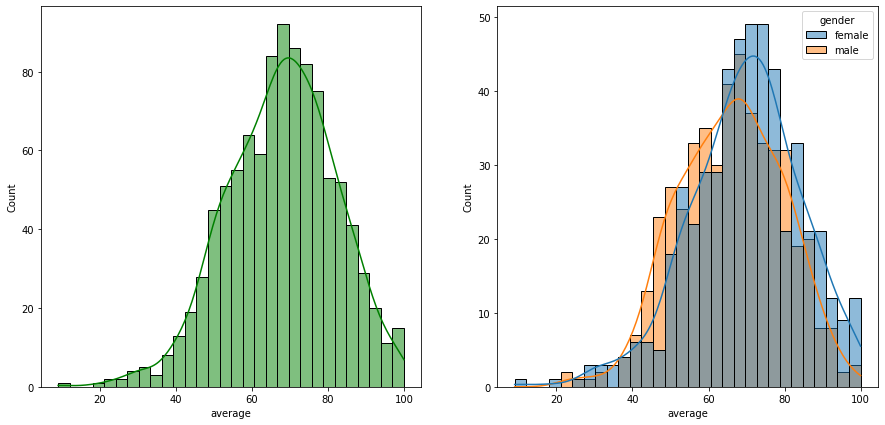

In [25]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde = True ,hue='gender')

### insight

- Female student tend to perform well then male student

<AxesSubplot:xlabel='total_score', ylabel='Count'>

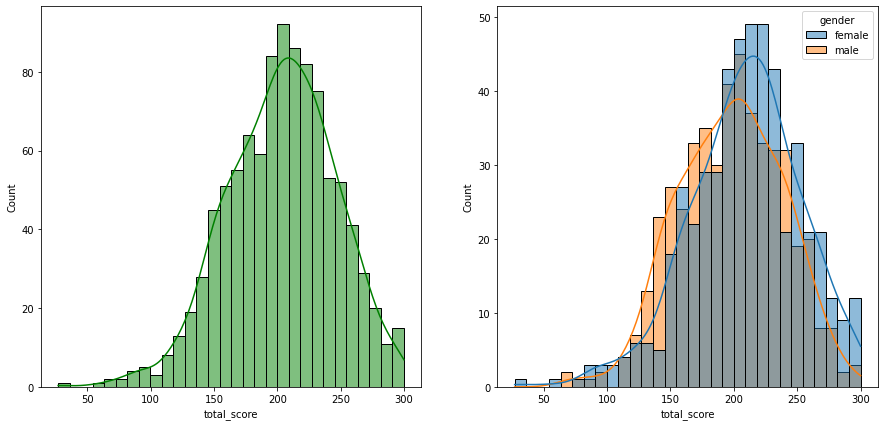

In [26]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,bins=30,hue='gender')

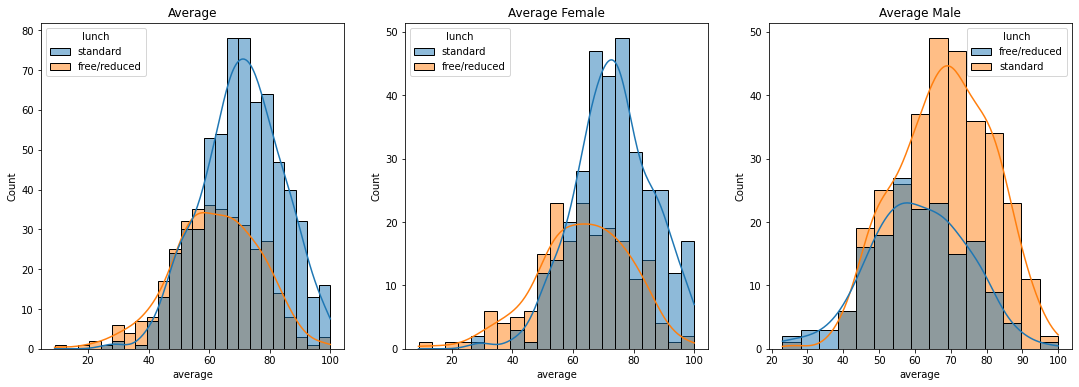

In [27]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Average')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Average Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Average Male')
plt.show()

### Insights
- standard lunch helps perform well in exam.
- Standard lunch helps perform well in exam be it a male or a female.

In [28]:
df.head(2)

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<AxesSubplot:xlabel='average', ylabel='Count'>

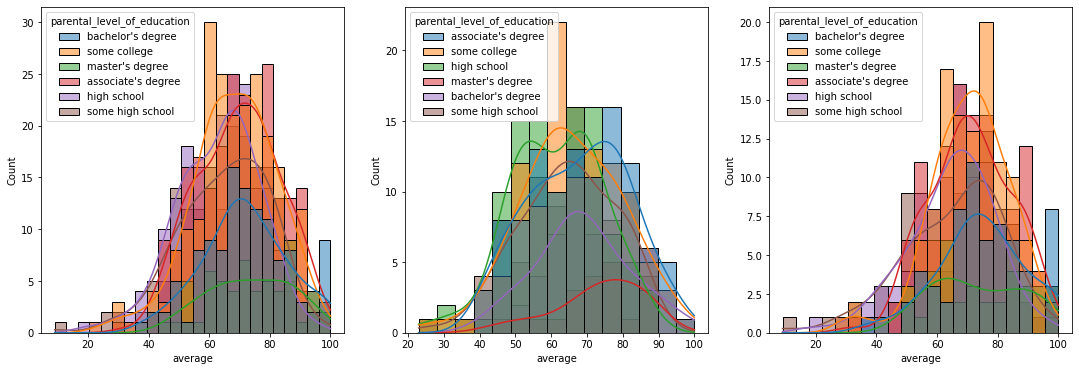

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

### Insight 
- in general parent's eduction don't help student perform well in exam.
- 2nd plot show that parent's whose education is of associate's degree or master degree their male child tend to perform well in exam.
- 3rd we can see there is no effect of parent's education on female students.


In [30]:
df.head(3)

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


<AxesSubplot:xlabel='average', ylabel='Count'>

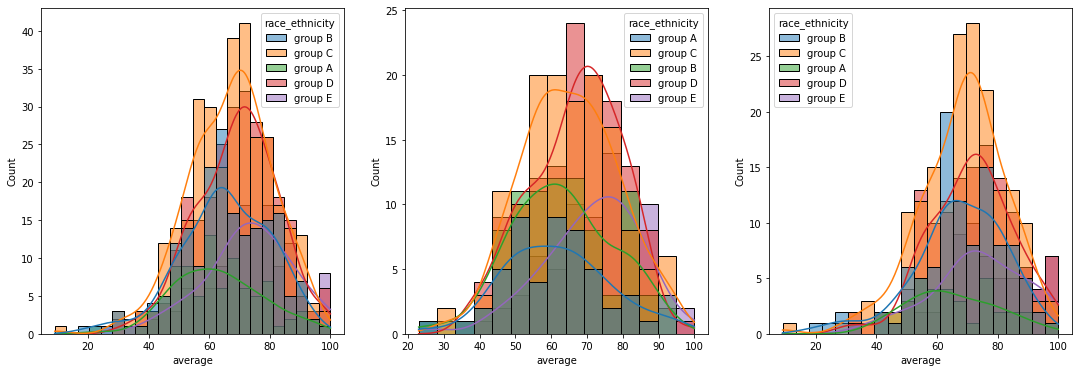

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde =True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

## Maximumum score of student in all three subjects


In [32]:
df.head(2)

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333


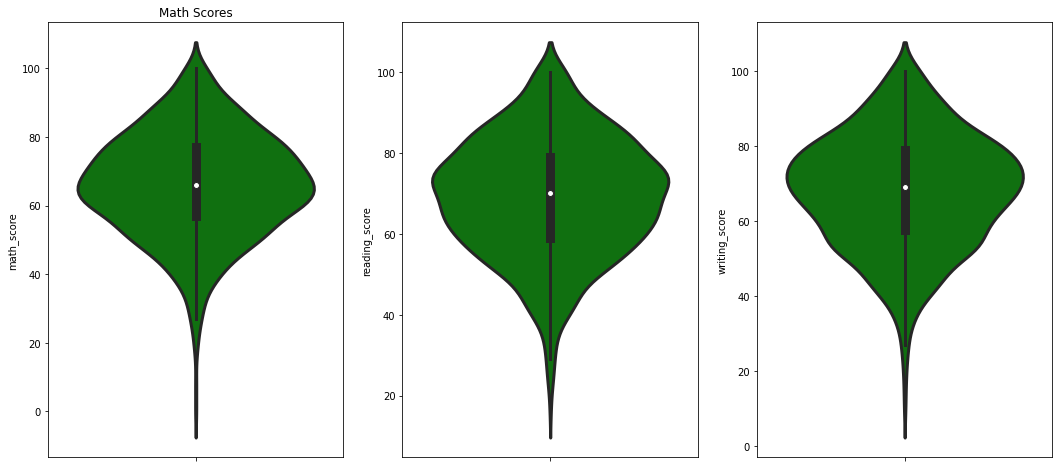

In [33]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='g',linewidth=3)
plt.subplot(132)
sns.violinplot(y='reading_score',data=df,color='g',linewidth=3)
plt.subplot(133)
sns.violinplot(y='writing_score',data=df,color='g',linewidth=3)
plt.show()

## insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in maths whereas in reading and writing most them score from 50-80

### Multivariate analysis using pieplot

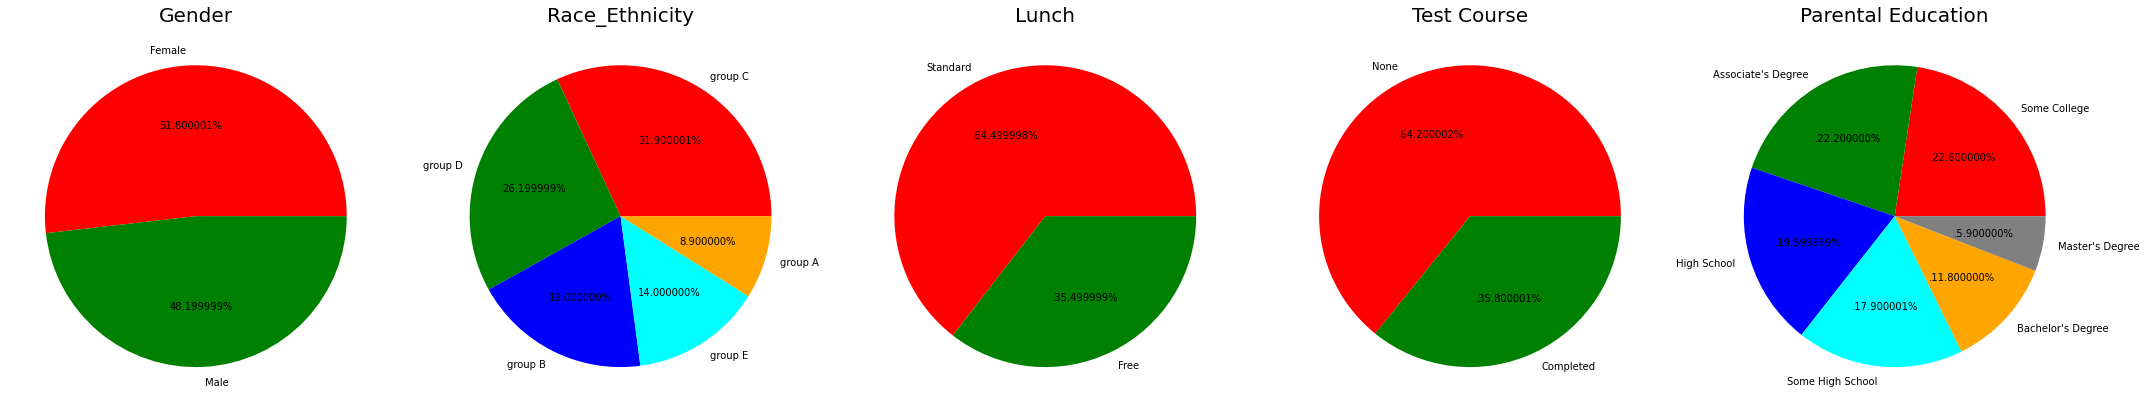

In [46]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize= 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ['group C','group D','group B','group E','group A']
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race_Ethnicity',fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [43]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [44]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64